In [56]:
import pandas as pd
df = pd.read_csv('ci_2010.csv', sep=',',skiprows=0,header=0)
data = pd.read_csv('station_2018.csv', sep=',',skiprows=0,header=0)

In [57]:
df.head()

,Stid,2010Y
0,50136,0.692961
1,50246,0.669491
2,50247,0.731528
3,50349,0.711492
4,50353,0.741475


In [58]:
data.head()

,Stid,Lat,Lon,Height
0,50136,5258,12231,4385
1,57378,3112,11238,1080
2,57381,3137,11320,1065
3,51068,477,8729,4970
4,57395,3135,11410,1200


In [59]:
data_out=pd.merge(df,data,how="inner")

In [60]:
data_out.to_csv("ci_2010_latlon.csv",index=True,sep=',')

In [61]:
data_out.head()

,Stid,2010Y,Lat,Lon,Height
0,50136,0.692961,5258,12231,4385
1,50246,0.669491,5221,12443,3619
2,50247,0.731528,522,12334,5145
3,50349,0.711492,5140,12424,5015
4,50353,0.741475,5144,12638,1739


In [62]:
import geopandas as gpd
from shapely.geometry import *
import matplotlib.pylab as plt
%matplotlib inline
fp = "/data/c03n02/cliu/data/map/province_2004.shp"
data = gpd.read_file(fp,encoding='gbk')

In [63]:
data.head()

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,NAME2004,geometry
0,54.482100,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,..."
1,129.067000,133.9940,2,2,150000,内蒙古自治区,"POLYGON ((114.0350036621094 40.60723876953125,..."
2,21.307000,43.5162,3,3,220000,吉林省,"(POLYGON ((125.255485534668 42.31010818481445,..."
3,0.048732,10.5302,4,4,20000,None,(POLYGON ((130.6258850097656 42.41724395751953...
4,175.086000,86.0992,5,5,650000,新疆维吾尔自治区,"POLYGON ((73.92559814453125 39.68169784545898,..."


In [64]:
data_out['Coordinates'] = list(zip(data_out.Lon/100, data_out.Lat/100))
data_out['Coordinates'] = data_out['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(data_out, geometry='Coordinates')

In [65]:
gdf.head()

,Stid,2010Y,Lat,Lon,Height,Coordinates
0,50136,0.692961,5258,12231,4385,POINT (122.31 52.58)
1,50246,0.669491,5221,12443,3619,POINT (124.43 52.21)
2,50247,0.731528,522,12334,5145,POINT (123.34 5.22)
3,50349,0.711492,5140,12424,5015,POINT (124.24 51.4)
4,50353,0.741475,5144,12638,1739,POINT (126.38 51.44)


In [66]:

# #f = lambda x:np.sum(gdf['Coordinates'].intersects(x))
# #data['geometry'].apply(f) #very slow
gdf.crs = data.crs
#gdf=gdf.dropna(subset=[ '2001'])#Remember to reassign
cities_with_country = gpd.sjoin(data,gdf,how="inner", op='intersects')

In [67]:
cities_with_country.head()

,AREA,PERIMETER,LEVEL1_,LEVEL1_ID,AD2004,NAME2004,geometry,index_right,Stid,2010Y,Lat,Lon,Height
0,54.4821,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,...",196,54096,0.672970,4424,13111,5678
0,54.4821,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,...",195,54094,0.649331,4430,12940,3057
0,54.4821,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,...",43,50968,0.640686,4513,12758,1897
0,54.4821,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,...",45,50978,0.690738,4518,13055,2725
0,54.4821,70.1328,1,1,230000,黑龙江省,"POLYGON ((132.8446807861328 45.06007385253906,...",40,50950,0.708292,4542,12515,1487


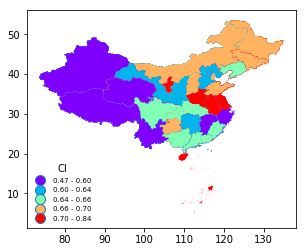

In [69]:
cities_with_country.plot('2010Y',scheme='Quantiles', cmap='rainbow',legend=True, \
                legend_kwds={'frameon': False, 'loc':'lower left', \
                                      #'bbox_to_anchor':(-0.2, 1.05),\
                                      'title': 'CI', 'fontsize': 7})

In [70]:
def plotMap():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([73, 135, 10, 55])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = '/data/c03n02/cliu/data/map/CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    newcmap = cmocean.tools.crop_by_percent(cmocean.cm.curl, 1, which='both', N=20)
    plt.scatter(lon,lat,#latlon=True,
          c=ccn,cmap=newcmap,alpha=0.8,transform=ccrs.PlateCarree()) #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'CI')
    plt.clim(0.4,1)
# make legend with dummy points
    plt.title("2010 CI", fontsize=20)
    return fig, ax


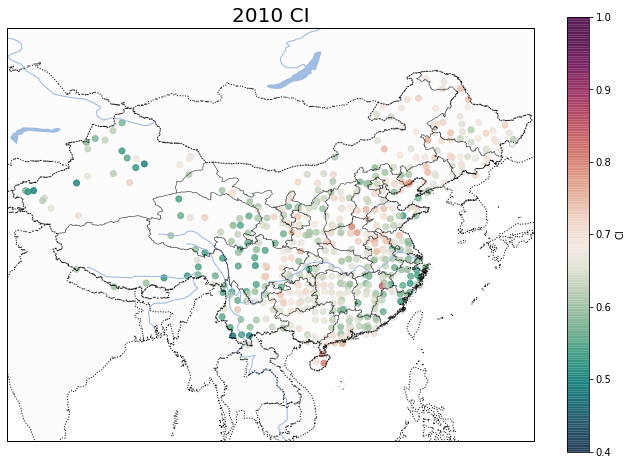

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib.colors import LogNorm,PowerNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

lat = gdf['Lat'].values/100
lon = gdf['Lon'].values/100
ccn = gdf['2010Y'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
ccn_min=np.nanmin(ccn)

fig, ax= plotMap()


In [ ]:
def plotMap_contour():
    #Set the projection information Cannot label gridlines on a LambertConformal plot. Only PlateCarree and Mercator plots are currently supported.
##add shapefile
    # add borders, coastline, rivers, lakes, and provinces of China
    proj = ccrs.PlateCarree(central_longitude=118.8)
    #Create a figure with an axes object on which we will plot. Pass the projection to that axes.
    fig, ax = plt.subplots(figsize=(11.8, 8),subplot_kw=dict(projection=proj))
    #ax.background_img(name='BM', resolution='high')
    #Zoom in
    ax.set_extent([73, 135, 10, 55])

    #Add map features
    ax.add_feature(cfeature.LAND, facecolor='0.99') #Grayscale colors can be set using 0 (black) to 1 (white)
    ax.add_feature(cfeature.LAKES, alpha=0.9)  #Alpha sets transparency (0 is transparent, 1 is solid)
    ax.add_feature(cfeature.BORDERS.with_scale('10m'), zorder=10, linestyle=':') # high resolution
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), zorder=10, linestyle=':') # mediate resolution
    ax.add_feature(cfeature.RIVERS) # low resolution
    #ax.stock_img()

    #We can use additional features from Natural Earth (http://www.naturalearthdata.com/features/)
    states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',  name='admin_1_states_provinces_lines',
            scale='50m',facecolor='none')
    ax.add_feature(states_provinces, edgecolor='gray', zorder=10)
    fname = '/data/c03n02/cliu/data/map/CHN_adm1.shp'
    adm1_shapes = list(Reader(fname).geometries())
    ax.add_geometries(adm1_shapes, crs=ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5,linewidths=0.5)
    #newcmap = cmocean.tools.crop_by_percent(cmocean.cm.curl, 1, which='both', N=20)
    plt.contourf(matrixLon,matrixLat,c=ccn,transform=ccrs.PlateCarree(),cmap='rainbow') #Normalize a given value to the 0-1 range on a log scale
    #Add lat/lon gridlines every 20° to the map
    plt.colorbar(label=r'CI')
    plt.clim(0.4,1)
# make legend with dummy points
    plt.title("2001 CI", fontsize=20)
    return fig, ax

In [ ]:
lat = gdf['Lat'].values/100
lon = gdf['Lon'].values/100
ccn = gdf['2001'].values
lat_max=np.nanmax(lat)
lon_max=np.nanmax(lon)
lat_min=np.nanmin(lat)
lon_min=np.nanmin(lon)
ccn_max=np.nanmax(ccn)
ccn_min=np.nanmin(ccn)
matrixLon, matrixLat = np.meshgrid(lon, lat)
fig, ax= plotMap_contour()